# Script para fazer análise exploratória dos discursos da câmara federal
- analisar frequência de termos(tokens)
- analisar frequencia N-grams (2grams, 3grams)

Esse procedimento será feito para tentar identificar alguma informação útil ou mais alguma limpeza que seja necessária ser feita em `limpa-texto`

In [ ]:
#https://kavita-ganesan.com/how-to-use-countvectorizer/#.XubRLkVKhPY
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
directory = "../data/csvs/"
discursos = pd.read_csv(directory+'discursos_plen_limpo.csv')

In [ ]:
discursos.info()

In [ ]:
discursos.isna().sum()

In [3]:
discursos.dropna(inplace = True)
discursos.index = [i for i in range(0,len(discursos))]

In [ ]:
discursos.isna().sum()

In [ ]:
discursos.loc[discursos.CLEAN_CONTENT.isna(),:]

In [ ]:
discursos.ORIGINAL_CONTENT[3068]

In [23]:
### AMOSTRA PARA TESTE
amostra = discursos.sample(int(len(discursos)*.1))
len(amostra)

11315

## Bag of words (matriz com contagem absolutas das palavras)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer   = CountVectorizer(ngram_range = (1,1))
vectorizer.fit(amostra.CLEAN_CONTENT)
vector = vectorizer.transform(amostra.CLEAN_CONTENT)
print(vector.shape)


(11315, 75260)


In [26]:
vectorizer_2 = CountVectorizer(ngram_range = (2,2))
vectorizer_2.fit(amostra.CLEAN_CONTENT)
vector_2 = vectorizer_2.transform(amostra.CLEAN_CONTENT)
print(vector_2.shape)


(11315, 1610914)


In [27]:
vectorizer_3 = CountVectorizer(ngram_range = (3,3))
vectorizer_3.fit(amostra.CLEAN_CONTENT)
vector_3 = vectorizer_3.transform(amostra.CLEAN_CONTENT)
print(vector_3.shape)


(11315, 2486521)


In [19]:
type(vector)
len(vectorizer.get_feature_names())
len(amostra)

33945

In [ ]:
for v in vector:
    print(v)
#toarray().sum(axis=0)

In [25]:
## criando dataframe com matriz das plavras
count_tokens = pd.DataFrame({'token':vectorizer.get_feature_names(),'qtd':vector.toarray().sum(axis=0)})
count_tokens.sort_values(by = 'qtd',ascending=False, inplace = True)


In [28]:
count_tokens_2 = pd.DataFrame({'token':vectorizer_2.get_feature_names(),'qtd':vector_2.toarray().sum(axis=0)})
count_tokens_2.sort_values(by = 'qtd',ascending=False, inplace = True)

MemoryError: 

In [ ]:
count_tokens_3 = pd.DataFrame({'token':vectorizer_3.get_feature_names(),'qtd':vector_3.toarray().sum(axis=0)})
count_tokens_3.sort_values(by = 'qtd',ascending=False, inplace = True)

## Análise da frequência de tokens(words)
`top 100`

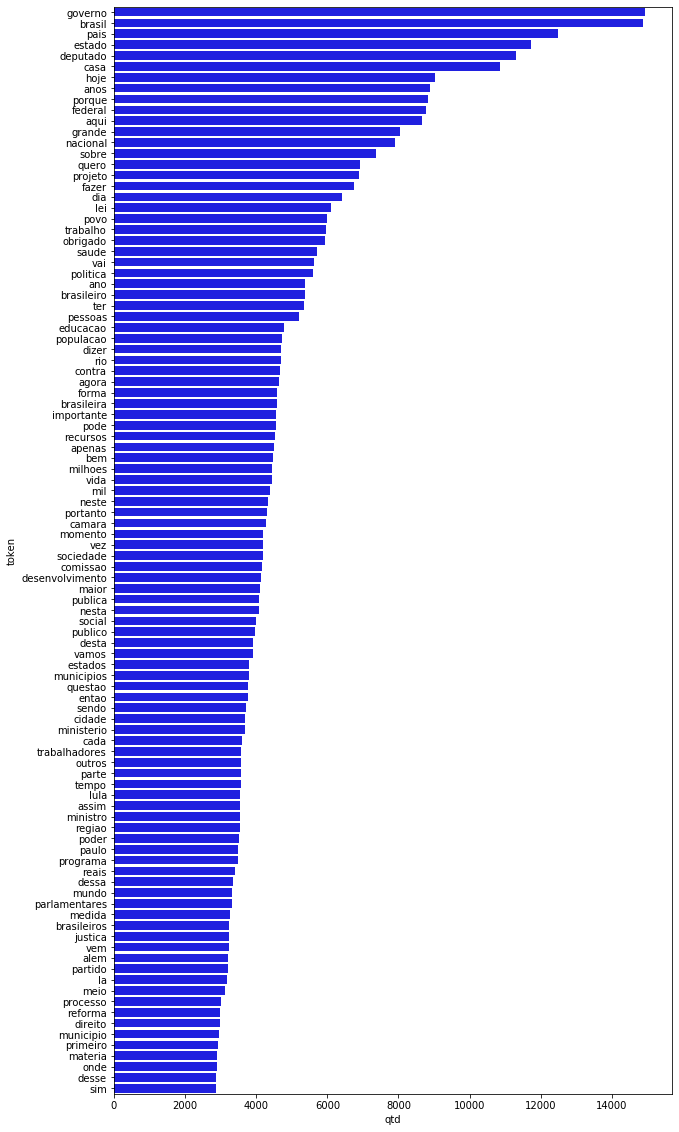

In [29]:
i = 100
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens.iloc[:i,:], color = 'blue')
plt.show()


## Análise da frequência de 2-grams (2 palavras )
`top 100`

In [ ]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens_2.iloc[:i,:], color = 'blue')
plt.show()


## Análise da frequência de 3-grams(3 palavras)
`top 100`

In [ ]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens_3.iloc[:i,:], color = 'blue')
plt.show()


## Análise de palavras únicas por ano(legislatura)
